In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.simplefilter('ignore')

In [4]:
# Data Loading
titanic = pd.read_csv(r"C:\Users\kansa\OneDrive\Desktop\data_analytics\Titanic-Dataset.csv")

# Quick inspection
print('First few rows:\n', titanic.head(3))
print('Data shape:', titanic.shape)

# Duplicates and nulls
print('Duplicate rows:', titanic.duplicated().sum())
print('Missing values per column:\n', titanic.isnull().sum())

First few rows:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
Data shape: (891, 12)
Duplicate rows: 0
Missing values per column:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [5]:
# Mean age per gender
print('Average age by gender:\n', titanic.groupby('Sex')['Age'].mean())

# Fill missing Age with average, drop Cabin (too many NaNs), and remove left-over missing
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.drop('Cabin', axis=1, inplace=True)
titanic.dropna(inplace=True)
print('Post-cleanup info:')
titanic.info()

Average age by gender:
 Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64
Post-cleanup info:
<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


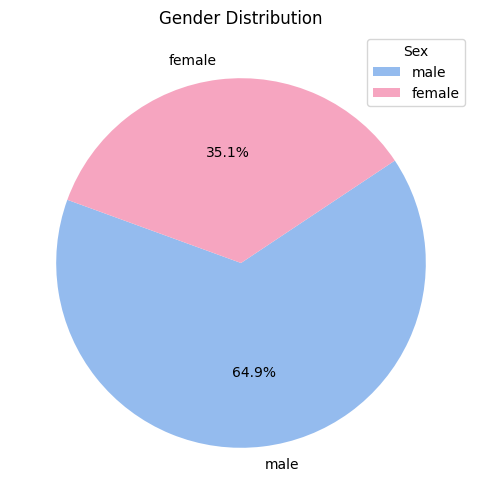

In [6]:
# ----- Gender Distribution Pie Chart -----
counts_gender = titanic['Sex'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(counts_gender, labels=counts_gender.index, autopct='%0.1f%%', startangle=160,
        colors=['#94bbee','#f6a5c0'])
plt.title('Gender Distribution')
plt.legend(title='Sex')
plt.show()

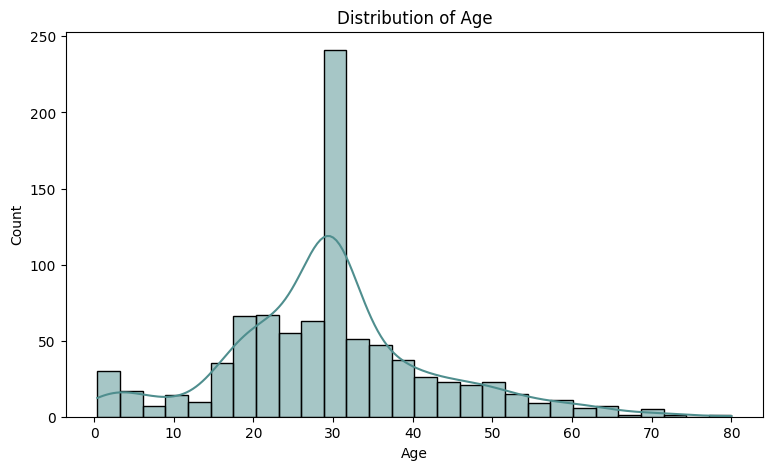

In [7]:
# ----- Age Histogram -----
plt.figure(figsize=(9,5))
sns.histplot(titanic['Age'], bins=28, kde=True, color='#4f8e8e')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

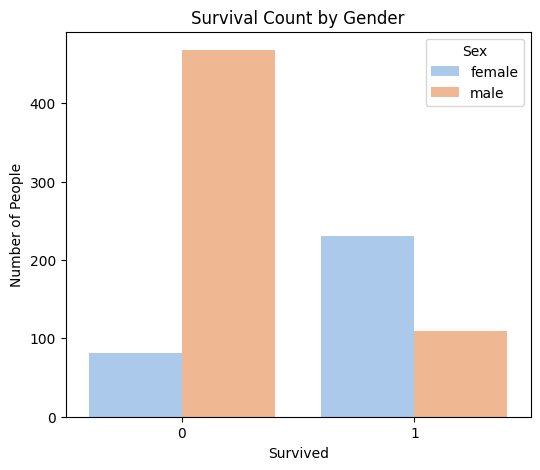

In [8]:
# ---- Survival vs Gender (Barplot) ----
sv_bysex = titanic.groupby(['Survived', 'Sex']).size().reset_index(name='Count')
plt.figure(figsize=(6,5))
sns.barplot(data=sv_bysex, x='Survived', y='Count', hue='Sex', palette='pastel')
plt.title('Survival Count by Gender')
plt.ylabel('Number of People')
plt.show()

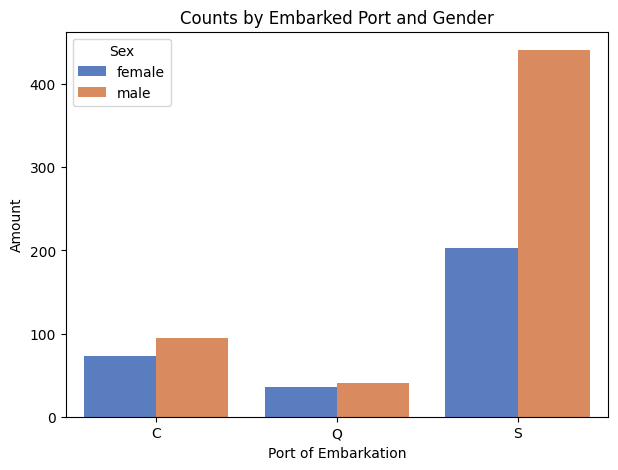

In [9]:
# ---- Embarked vs Gender ----
emb_gender = titanic.groupby(['Embarked', 'Sex']).size().reset_index(name='Amount')
plt.figure(figsize=(7,5))
sns.barplot(data=emb_gender, x='Embarked', y='Amount', hue='Sex', palette='muted')
plt.xlabel('Port of Embarkation')
plt.title('Counts by Embarked Port and Gender')
plt.show()

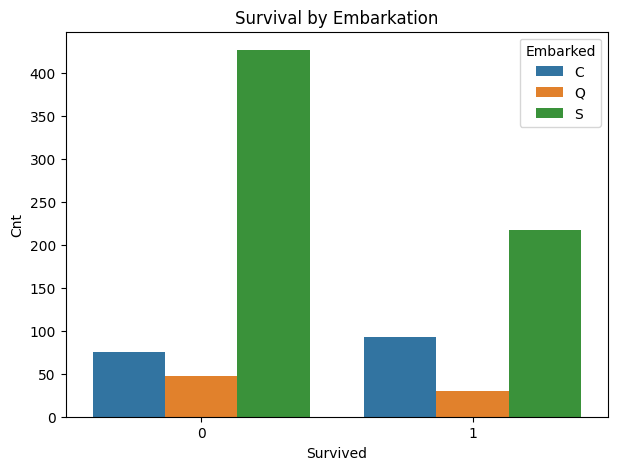

In [10]:
# ---- Survival vs Embarked ----
sv_emb = titanic.groupby(['Survived', 'Embarked']).size().reset_index(name='Cnt')
plt.figure(figsize=(7,5))
sns.barplot(data=sv_emb, x='Survived', y='Cnt', hue='Embarked')
plt.title('Survival by Embarkation')
plt.show()

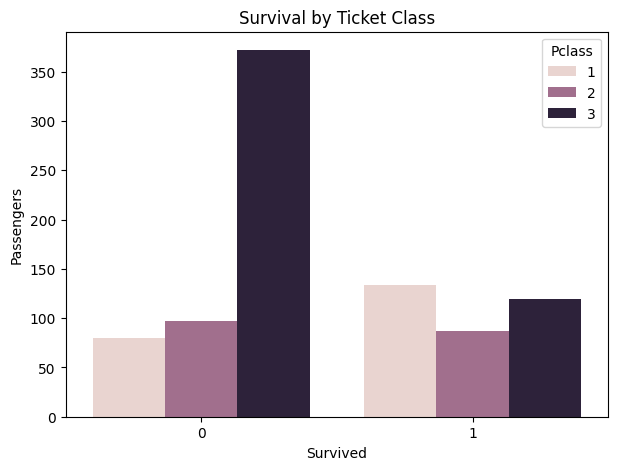

In [11]:
# ---- Survival by Class ----
surv_class = titanic.groupby(['Survived', 'Pclass']).size().reset_index(name='Passengers')
plt.figure(figsize=(7,5))
sns.barplot(data=surv_class, x='Survived', y='Passengers', hue='Pclass')
plt.title('Survival by Ticket Class')
plt.show()

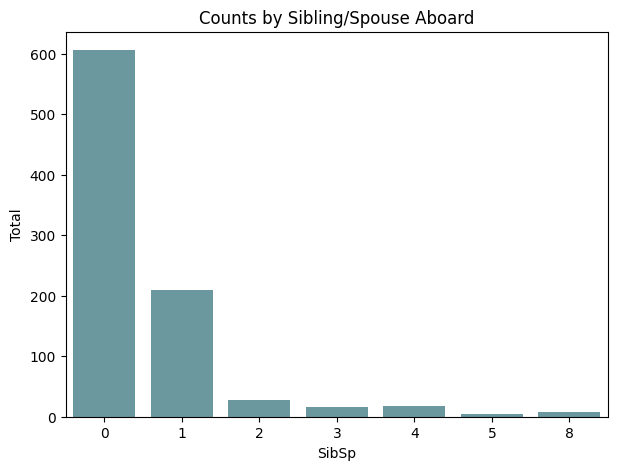

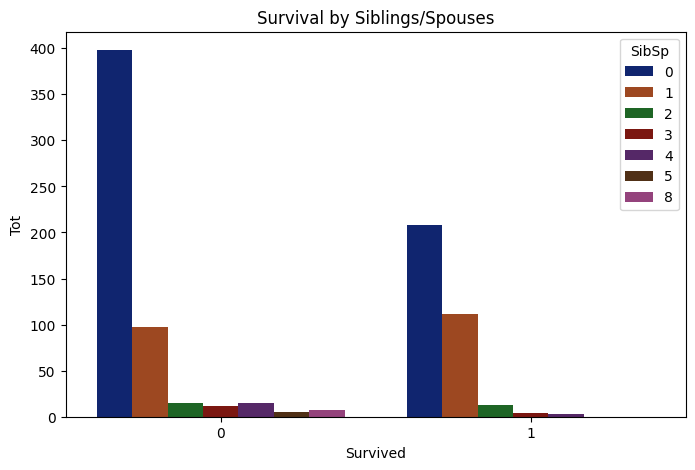

In [12]:
# ---- Siblings/Spouses (SibSp) Plots ----
sibsp_counts = titanic['SibSp'].value_counts().reset_index().rename(columns={'index': 'SibSp', 'count': 'Total'})
plt.figure(figsize=(7,5))
sns.barplot(x='SibSp', y='Total', data=sibsp_counts, color='#639fa6')
plt.title('Counts by Sibling/Spouse Aboard')
plt.show()

sv_sibsp = titanic.groupby(['Survived', 'SibSp']).size().reset_index(name='Tot')
plt.figure(figsize=(8,5))
sns.barplot(data=sv_sibsp, x='Survived', y='Tot', hue='SibSp', palette='dark')
plt.title('Survival by Siblings/Spouses')
plt.legend(title='SibSp')
plt.show()


In [13]:
# ----- Preprocessing for ML -----
df_ml = titanic.drop(['PassengerId', 'Ticket', 'Name'], axis=1)
for col in ['Sex', 'Embarked']:
    le = LabelEncoder()
    df_ml[col] = le.fit_transform(df_ml[col])

X = df_ml.drop('Survived', axis=1)
y = df_ml['Survived']

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(X, y, test_size=0.2, random_state=11)

# ----- Logistic Regression -----
logreg = LogisticRegression()
logreg.fit(X_tr, y_tr)
print('Logistic Regression train score:', logreg.score(X_tr, y_tr))
print('Logistic Regression test score:', logreg.score(X_te, y_te))

# ----- Random Forest Classifier -----
rf = RandomForestClassifier()
rf.fit(X_tr, y_tr)
print('Random Forest train score:', rf.score(X_tr, y_tr))
print('Random Forest test score:', rf.score(X_te, y_te))

Logistic Regression train score: 0.7946554149085795
Logistic Regression test score: 0.8426966292134831
Random Forest train score: 0.9831223628691983
Random Forest test score: 0.8089887640449438
